<h1><b>What Makes People Happy?</b></h1>
<h3>A study of global happiness, with data from the 2019 World Happiness Report</h3>

<h3><b>Motivation</b></h3>
<p>Since the beginning of the pandemic, people have become more conscious about living 'happily' and in a way that fulfills them. Whether that entails working to make the world a better place (and continuing a fight for justice for those of all races, genders, income levels, and so on), choosing to prioritize a work-life balance and selecting options that allow for flexibility in schedules, no longer wanting to work for minimum wage (and pushing for a liveable wage), taking the time to engage in 'self-care', or emphasizing mental health (and how it manifests) in the workplace and society as a whole, what constitutes 'happiness' is something I wanted to explore due to this prioritization prevalent today.</p>
<p><a href='https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2019.csv'>The World Happiness Report</a> is one such source that monitors this by using data from the Gallup World Poll to 'estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.'</p>
<p>Another way to monitor this 'happiness' is to look into happiness scores for each country and compare them to factors indicative of (negative) mental health. Examples of this would include rates of depression, suicide, and substance abuse present in each given population. While I will not be investigating substance abuse and suicide rates in relation to mental health in this tutorial, it is something to take note of for the future.</p> 
<p><a href='https://www.healthdirect.gov.au/signs-mental-health-issue#:~:text=Nine%20signs%20of%20mental%20health%20issues%201%201.,8.%20Feeling%20guilty%20or%20worthless%20...%20More%20items'>Signs of Mental Health Issues</a> | <a href='https://www.cdc.gov/mentalhealth/learn/index.htm'>CDC: Mental Health</a> | <a href='https://ezcareclinic.io/factors-affecting-mental-health/'>Factors Affecting Mental Health</a> | <a href='https://ourworldindata.org/mental-health'>Our World in Data: Mental Health</a> | <a href='https://www.who.int/news-room/fact-sheets/detail/mental-disorders'> WHO: Mental Disorder Factsheet</a> | <a href='https://apps.who.int/gho/data/node.home'>WHO: Global Health Observatory Data Repository</a></p>
<p>Note: 'Happiness' can mean very different things. The <a href='https://www.merriam-webster.com/dictionary/happiness'>Merriam-Webster Dictionary</a> defines it as 'a state of well-being and contentment' and/or 'a pleasurable or satisfying experience'. I will primarily be using the former definition when referring to this state of being. I would also like to mention that while I will be examining mental illness in relation to 'happiness', this does not mean that mental illness is a direct factor of 'happiness', or vice versa. Mental illness can be genetic, caused by factors not taken into account by the World Happiness Report, and so on.</p>

<h3><b>I. Data Collection/Curation and Parsing</b></h3>
<p>The first thing we will do is collect and make the following datasets usable: <li>The 'World Happiness Report' dataset from 2019 (via <a href='https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2019.csv'>Kaggle</a>)</li><li>The 'Estimated population-based prevalence of depression' dataset (via <a href='https://www.who.int/data/gho/data/indicators/indicator-details/GHO/estimated-population-based-prevalence-of-depression'>WHO</a>)</li><li>The 'Mental health Depression disorder Data' dataset (via <a href='https://data.world/vizzup/mental-health-depression-disorder-data'>data.world</a>)</li></p>

Start with the World Happiness Report dataset:

In [108]:
# import pandas, a python library, to aid with this task
import pandas as pd
# read in the CSV file using pandas
happiness_report_2019 = pd.read_csv('archive/2019.csv')
# display the first five lines to understand what the data looks like
happiness_report_2019.head() 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Next, we will go to the Depression Prevalence dataset:

In [27]:
# read in CSV file using pandas
dep_prev = pd.read_csv('population_based_prevalence_of_depression.csv')
# display the first five lines to understand what the data looks like
dep_prev.head()
# see if data for 2019 is featured here
dep_prev['Period'].unique()

array([2015], dtype=int64)

Because data for 2019 is not featured here, we will either need to look for a new dataset, switch to 2015 for the World Happiness Index Report, or completely drop this dataset if the third set from data.world proves to be useful.

The Mental Health Disorders dataset:

In [28]:
# read in excel file using pandas
disorders = pd.read_excel('Mental health Depression disorder Data.xlsx')
# display the first five lines to understand what the data looks like
disorders.head()
# see if data for 2019 is featured here
disorders['Year'].unique()

array([1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017.])

Because there is no data available for 2019, we will use the 2017 dataset for the World Happiness Report data and drop the dataset on Depression Prevalance. While we could have simply used data from 2015 for all three, I think it would be better to aim to use data as recent as possible for an analysis more 'relevant' to today.

In [109]:
# read in the 2017 CSV file using pandas
happiness_report_2017 = pd.read_csv('archive/2017.csv')
# display the first five lines to understand what the data looks like
happiness_report_2017.head() 

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


<h3><b>II. Data Management/Representation</b></h3>

For this section, we will begin by joining the above given datasets together.

In [31]:
# start with happiness_report + disorders

# print out the first five rows of 'disorders' to regain an understanding of the data
disorders.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990.0,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991.0,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992.0,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993.0,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994.0,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


Because this dataset has a row per year and per Country/'Entity', we will need to group by year in order to isolate the data for 2017.

In [53]:
disorders_by_year = disorders.groupby('Year')
disorders_2017 = []
for i in disorders_by_year:
    if (i[0] == 2017):
        disorders_2017 = i[1]

# reset indices of rows for the table
disorders_2017.reset_index(inplace=True, drop=True)
# drop the year column because we already know it's 2017
disorders_2017.drop(['Year'], axis=1, inplace=True)

In [110]:
# print out 'happiness_report_2017' to regain an understanding of the data
happiness_report_2017

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


Note that both of these dataframes do not have the same rows. As a result, some data will be lost when we merge.

In [215]:
# rename the 'Entity' column in disorders_2017 to make things easier for merge
disorders_2017.rename(columns = {'Entity':'Country'}, inplace = True)
# merge the datasets together via inner join to remove nulls
happiness_and_mental_health = pd.merge(happiness_report_2017, disorders_2017, on='Country', how='inner')
happiness_and_mental_health.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Code,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,NOR,0.211484,0.856901,0.570363,7.585503,0.832286,3.771910,1.419003
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,DNK,0.254017,1.005494,0.540025,5.314635,0.895411,3.291885,1.730723
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,ISL,0.257617,0.971122,0.558014,5.290988,0.725036,3.361665,1.249029
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,CHE,0.262487,0.953996,0.573969,5.359393,1.006218,3.708060,1.379690
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,FIN,0.257444,1.005826,0.594938,3.752062,0.951914,4.792736,2.605061


In [216]:
# add up the % of the population with the different health conditions for later analysis
happiness_and_mental_health['%_pop_w_disorders/mental_illnesses'] = happiness_and_mental_health['Schizophrenia (%)'] + happiness_and_mental_health['Bipolar disorder (%)'] + happiness_and_mental_health['Eating disorders (%)'] + happiness_and_mental_health['Anxiety disorders (%)'] + happiness_and_mental_health['Drug use disorders (%)'] + happiness_and_mental_health['Depression (%)'] + happiness_and_mental_health['Alcohol use disorders (%)']
happiness_and_mental_health.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,...,Dystopia.Residual,Code,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),%_pop_w_disorders/mental_illnesses
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,...,2.277027,NOR,0.211484,0.856901,0.570363,7.585503,0.832286,3.771910,1.419003,15.247450
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,...,2.313707,DNK,0.254017,1.005494,0.540025,5.314635,0.895411,3.291885,1.730723,13.032190
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,...,2.322715,ISL,0.257617,0.971122,0.558014,5.290988,0.725036,3.361665,1.249029,12.413469
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,...,2.276716,CHE,0.262487,0.953996,0.573969,5.359393,1.006218,3.708060,1.379690,13.243813
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,2.430182,FIN,0.257444,1.005826,0.594938,3.752062,0.951914,4.792736,2.605061,13.959981


The data for the top five happiest countries given above already shows us that the 'happiest' country on Earth (as noted by the World Happiness Report) has a higher percentage of people with mental illnesses and/or disorders than the other countries present.

<h3><b>III. Exploratory Data Analysis</b></h3>

Before we start anything, let us keep in mind the dataframes we have access to (and will use), in addition to the information they store:
<li>'happiness_report_2019' - The World Happiness Report Dataset (2019)</li><li>'happiness_report_2017' - The World Happiness Report Dataset (2017)</li><li>'disorders_2017' - The Percentage of each Country's Population with Specific Mental Illnesses/Disorders (2017)</li><li>'happiness_and_mental_health' - The 2nd and 3rd dataframes with a total percentage of each country's population with mental illnesses/disorders (2017)</li>

# world map of everything (disorders 2017, all factors in happiness index)

We will start with first viewing all of the columns for the dataframe we created above.

In [188]:
happiness_and_mental_health.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Code',
       'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)',
       'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)', '%_pop_w_disorders/mental_illnesses'],
      dtype='object')

Let's first look at how each country's 'happiness' score compares with the percentage of their population with mental illnesses or disorders. We will start by using a scatterplot to visualize this.

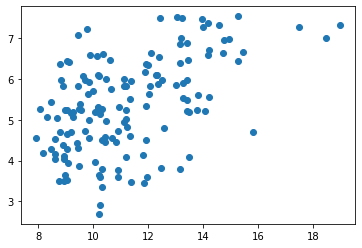

In [231]:
import matplotlib.pyplot as plt
plt.scatter(x=happiness_and_mental_health['%_pop_w_disorders/mental_illnesses'], y=happiness_and_mental_health['Happiness.Score'])

Let's also print out the summary statistics for happiness_and_mental_health['%_pop_w_disorders/mental_illnesses'].

In [190]:
print(happiness_and_mental_health['%_pop_w_disorders/mental_illnesses'].describe())

count    147.000000
mean      11.216237
std        2.166738
min        7.912260
25%        9.488872
50%       10.681989
75%       12.545479
max       18.974350
Name: %_pop_w_disorders/mental_illnesses, dtype: float64


Given these two pieces of information (the graph and the summary statistics), we can see there is some sort of a positive linear relationship between mental illnesses/disorders and country's 'happiness' scores. Additionally, while this also may be dependent on poor data collection in select countries, bias in the happiness score model, or some other factor not accounted for, most of the countries in the dataframe seem to cluster around 8-14% of the population having some sort of mental illness/disorder (with a few outliers featuring both a high population percentage AND a high happiness score). 

Let's run a linear regression to be sure. Because these models are sensitive to outliers, we'll remove them from the data before running a regression. This will be done by removing all of the countries with percentages higher than 14% from the dataframe.

In [238]:
# make a copy + keep the original dataframe as is (just in case)
happiness_and_mental_health2 = happiness_and_mental_health.copy()
# drop the rows if the value in happiness_and_mental_health2['%_pop_w_disorders/mental_illnesses'] > 14
happiness_and_mental_health2.drop(happiness_and_mental_health2[happiness_and_mental_health2['%_pop_w_disorders/mental_illnesses'] > 14].index, inplace = True)

In [239]:
print(happiness_and_mental_health2['%_pop_w_disorders/mental_illnesses'].describe())

count    130.000000
mean      10.679310
std        1.583165
min        7.912260
25%        9.406428
50%       10.327404
75%       11.927166
max       13.959981
Name: %_pop_w_disorders/mental_illnesses, dtype: float64


We will now run a linear regression.

In [240]:
import statsmodels.api as sm

reg = sm.OLS(happiness_and_mental_health2['%_pop_w_disorders/mental_illnesses'], happiness_and_mental_health2['Happiness.Score'],).fit()
print(reg.summary())

                                         OLS Regression Results                                        
Dep. Variable:     %_pop_w_disorders/mental_illnesses   R-squared (uncentered):                   0.959
Model:                                            OLS   Adj. R-squared (uncentered):              0.958
Method:                                 Least Squares   F-statistic:                              2993.
Date:                                Wed, 14 Dec 2022   Prob (F-statistic):                    3.95e-91
Time:                                        12:12:57   Log-Likelihood:                         -286.63
No. Observations:                                 130   AIC:                                      575.3
Df Residuals:                                     129   BIC:                                      578.1
Df Model:                                           1                                                  
Covariance Type:                            nonrobust           

Given the Least-Squared regression results, it seems that there is a positive linear relationship between % of the population with mental illnesses/disorders and the happiness score of the given country. This is interesting because this is not what I had expected going in. It is, however, important to reiterate the existence of potential biases in the happiness score and/or inadequate data collection practices regarding mental health (especially likely due to mental health stigma present in these given countries).

We will now examine the Happiness Report dataset from 2017 to see if we can find any reasons for this.

For context, # explain how scores are calculated